<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week09/6_20_22_Mall_Customer_Analysis_with_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# new libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dataset: 

This dataset is about customers and spending habits.  The problem we are solving is how to group similar customers together and understand the different groups.  This is a common clustering problem called Customer Segmentation.

Link to Dataset:

https://docs.google.com/spreadsheets/d/e/2PACX-1vQGG95zRf7Hmos7Gx7VqpJmksOos3bgxr73KYfmc8soEnvk_L4rVcNPcUHDpmNMDnRyof6UPlm-DTEp/pub?gid=1011669702&single=true&output=csv

In [12]:
#Load in data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQGG95zRf7Hmos7Gx7VqpJmksOos3bgxr73KYfmc8soEnvk_L4rVcNPcUHDpmNMDnRyof6UPlm-DTEp/pub?gid=1011669702&single=true&output=csv')

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# The Project:

This is a the .head() from a dataset for mall customers and this is the [original source](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).

Our challenge is to provide a meaningful analysis of customer groups based on the data.

This is a business analyst task that can be improved with unsupervised learning.  

# Planning the Exploration


1. Use  Kmeans to establish clusters based on just the income and the spending score.  
* How many clusters seems optimal?
* Make a scatterplot with these features and color code it based on the cluster.

2. Perform a similar investigation based the age and the spending score.
* How many clusters seems optimal?
* Make a scatterplot with these features and color code it based on cluster

3. What happens when you combine all three features? (age, income, and spending?)
	As a challenge make a 3D scatterplot!  See [link here](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/) for info on 3D scatterplot


##Task 1: Use  Kmeans to establish clusters based on just the income and the spending score.  Remember that you must use scaled data for Kmeans.
How many clusters seem optimal?



In [14]:
# define the columns you want to use (X is fine, but remember there isn't an X and y)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Remember:
Do NOT train/test split

In [15]:
# check head of new data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# **Why do we scale data**
- Clustering algorithms are looking for points that are 'close' together.  However, if the features are on different scales, for instance if one is on the order of 10s and another is on the order of 100000s, then the feature with the larger variance, the one on the scale of 100000s, will have an outsized effect on how the algorithm determines 'closeness'.
- By scaling the features, each feature will be considered equally in determining how close or far apart data points are.

## Unscaled Distances

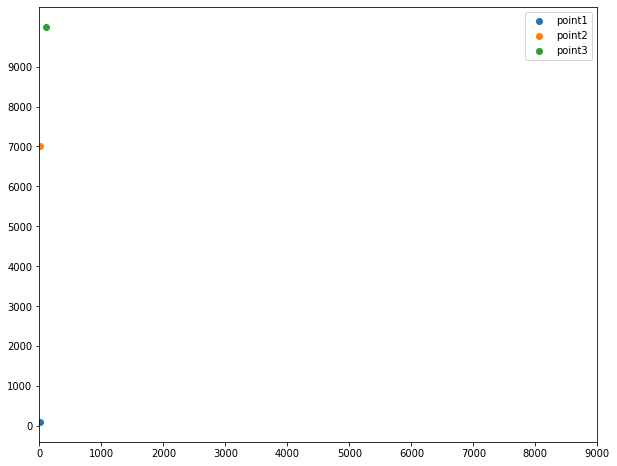

In [16]:
point1 = [10, 100]
point2 = [11, 7000]
point3 = [100, 10000]
points = pd.DataFrame([point1, point2, point3])

plt.figure(figsize=(10,8))
plt.scatter(points.iloc[0][0], points.iloc[0][1], label='point1')
plt.scatter(points.iloc[1][0], points.iloc[1][1], label='point2')
plt.scatter(points.iloc[2][0], points.iloc[2][1], label='point3')
plt.xticks(range(0,10000,1000))
plt.yticks(range(0,10000,1000))
plt.legend()


## Scaled Distances

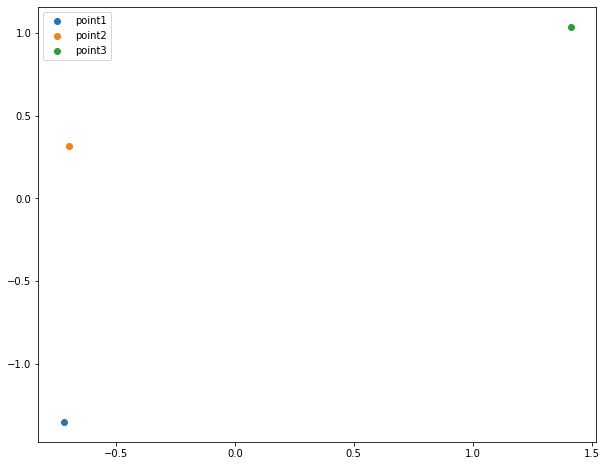

In [17]:
points_scaled = pd.DataFrame(StandardScaler().fit_transform(points))

plt.figure(figsize=(10,8))

plt.scatter(points_scaled.iloc[0][0], points_scaled.iloc[0][1], label='point1')
plt.scatter(points_scaled.iloc[1][0], points_scaled.iloc[1][1], label='point2')
plt.scatter(points_scaled.iloc[2][0], points_scaled.iloc[2][1], label='point3')
plt.legend()

# Scale the Data

In [27]:
scaled_X = StandardScaler().fit_transform(X)
scaled_X[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

# KMeans number of features Poll

# Choosing Number of Clusters

Kmeans does not choose the number of clusters to group the data into, that's our job!

There are many ways to do this:
1. Subject Matter Expertise
2. Try several different numbers and explore the clusters for each to see if they make sense.
3. Inertia method
4. Silhouette Score method


# Inertia

* Inertia is measured from each sample to the centroid of its cluster (the centroid is just the center)

* The closer each point is to the center of its cluster, the tighter the cluster

* A lower inertia indicates better clustering

* The more clusters you have, the lower the inertia will be

* But too many clusters is not useful (imagine the extreme case where every data point was its own cluster---inertia would be minimized, but there are no useful groups)

* So, we look for a tradeoff between inertia and the number of clusters


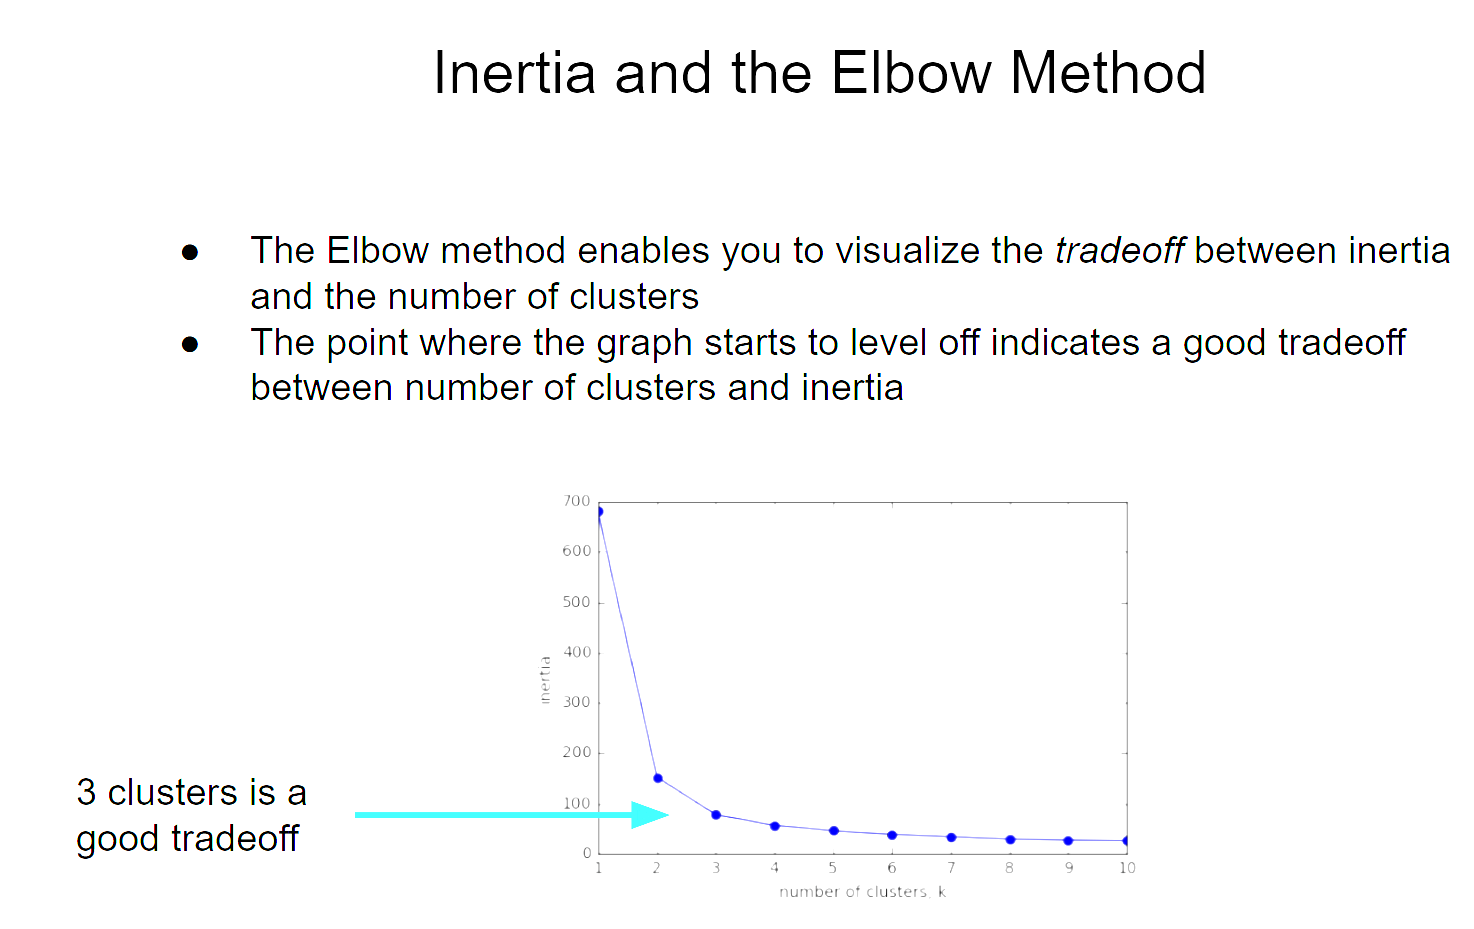

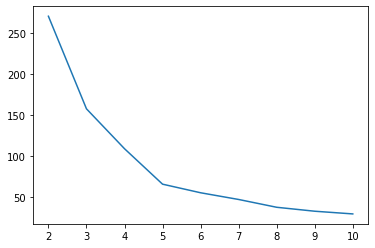

In [29]:
# define a range of values of k to evaluate for inertia, fit and run the model, and plot the results
ks = range(2, 11)
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(scaled_X)
  inertias.append(kmeans.inertia_)
plt.plot(ks, inertias)

# Silhouette Score

* Silhouette score is a measure of how dense each cluster is and how well separated they are from each other.

* The metric is similar to inertia in its overall goal, but it is calculated and interpreted differently.

* Rather than basing the calculations on the centroid, the calculation is based on the distance between points in the same cluster vs distance between points in different clusters

* The silhouette score is computed on every datapoint in every cluster

* The range of Silhouette Scores is -1 to 1 with a **higher score being better**

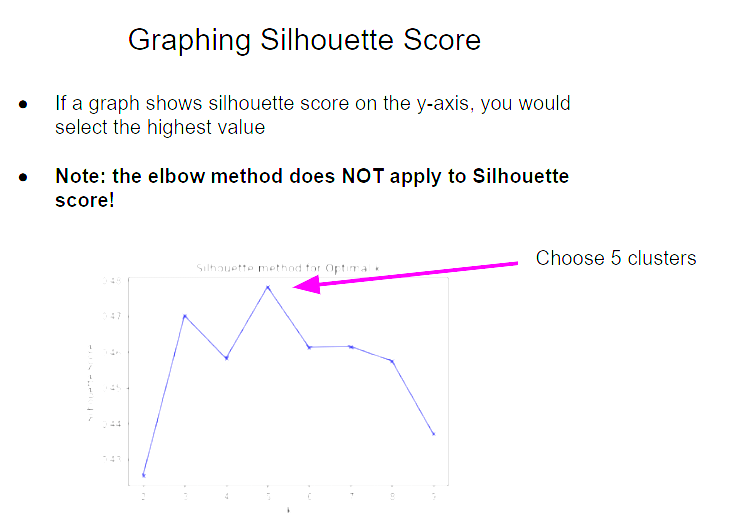

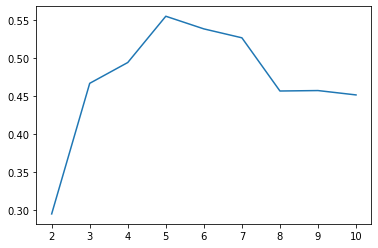

In [32]:
# define a range of values of k to evaluate for silhouette score, fit and run the model, and plot the results
sils = []
for k in ks:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(scaled_X)
  sils.append(silhouette_score(scaled_X, kmeans.labels_))
plt.plot(ks, sils)

# NOTE

Sometimes the Inertia Elbow Method and the Silhouette Score disagree!  There is no exact science for choosing clusters.

# Final Model and Clustering the Dataset

In [33]:
# instantiate a Kmeans model with the value for k based on elbow plot method and silhouette score
kmeans = KMeans(n_clusters = 5)

In [35]:
# add a column to the dataframe to add the cluster label as you fit and predict x 
kmeans.fit(scaled_X)
df['clusters'] = kmeans.labels_

In [36]:
# examine your dataframe with .head()
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


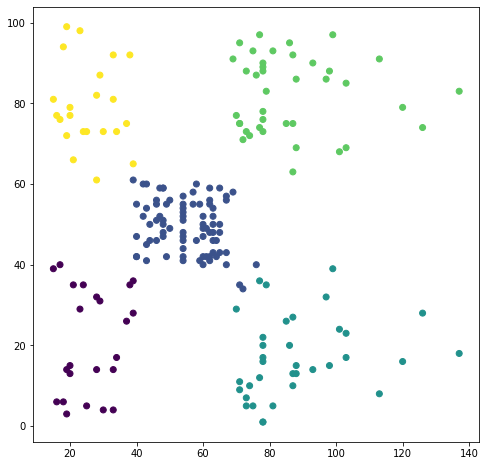

In [40]:
# Make a scatterplot with these features and color code it based on the cluster.
plt.figure(figsize = (8, 8));
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = df['clusters']);

# Investigate each of the clusters. 

For example: What is the minimum and maximum income for each cluster? Hint: use grouby to group by cluster and investigate summary statistics for each cluster.

## Feature Means

In [45]:
# Use .groupby() to investigate the average .
df.groupby('clusters')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,23.0,26.304348,7.893811,15.0,19.50,25.0,33.00,39.0
1,81.0,55.296296,8.988109,39.0,48.00,54.0,62.00,76.0
2,35.0,88.200000,16.399067,70.0,77.50,85.0,97.50,137.0
3,39.0,86.538462,16.312485,69.0,75.50,79.0,95.00,137.0
4,22.0,25.727273,7.566731,15.0,19.25,24.5,32.25,39.0


In [ ]:
# Visualize means values of each column



## Use `.describe()` to look at all statistics for one feature.

In [ ]:
# Get all statistics for one column for each cluster


# Slightly Easier Plotting

In [ ]:
# Using bar plot display each feature mean for the cluster


## More Feature Statistics

# 3D Plotting

# Your Turn!

Try clustering this data yourself, but try not to copy and paste!

#[Starter Notebook](https://drive.google.com/file/d/1PCCqzzksYU1TvzcXXGPSO6nBaXIGy7rH/view?usp=sharing)